In [84]:
import pandas as pd
import numpy as np
import networkx as nx
import nxpd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from import_dataset import get_header
from communities import find_communities_modularities

# Sample EDA

## Dataset: Physician Shared Patients Shared Patterns

In [2]:
header = get_header('../data/referral/physician-shared-patient-patterns-2014-days180_FileHeader.csv')
sample_graph_df = pd.read_csv('../data/referral/physician-shared-patient-patterns-2014-days180-sample.txt', names=header)

In [3]:
sample_graph_df.head()

,Initial Physician NPI,Secondary Physician NPI,Shared Count,Number Unique Beneficiaries,Number Same Day Visits
0,1063590222,1760575641,96,27,3
1,1790184497,1427005735,68,13,0
2,1154381309,1861495335,253,20,15
3,1538144910,1801826219,40,22,4
4,1134293798,1346341948,68,24,6


In [4]:
sample_graph_df.shape

(100000, 5)

In [5]:
sample_graph_df.describe()

,Initial Physician NPI,Secondary Physician NPI,Shared Count,Number Unique Beneficiaries,Number Same Day Visits
count,1.000000e+05,1.000000e+05,100000.000000,100000.00000,100000.00000
mean,1.497631e+09,1.503760e+09,305.986650,43.66123,10.52255
std,2.948775e+08,2.903537e+08,1328.118843,114.59024,103.82255
min,1.003000e+09,1.003001e+09,11.000000,11.00000,0.00000
25%,1.245402e+09,1.255363e+09,49.000000,14.00000,0.00000
50%,1.497831e+09,1.508870e+09,98.000000,21.00000,0.00000
75%,1.740270e+09,1.750364e+09,225.000000,38.00000,2.00000
max,1.000000e+10,1.000000e+10,121156.000000,8715.00000,8361.00000


In [6]:
sample_graph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
Initial Physician NPI          100000 non-null int64
Secondary Physician NPI        100000 non-null int64
Shared Count                   100000 non-null int64
Number Unique Beneficiaries    100000 non-null int64
Number Same Day Visits         100000 non-null int64
dtypes: int64(5)
memory usage: 3.8 MB


In [39]:
relationship_vars = ['Initial Physician NPI', 'Secondary Physician NPI']
num_vars = ['Shared Count', 'Number Unique Beneficiaries', 'Number Same Day Visits']

In [72]:
# Converting ids to category dtype
for var in relationship_vars:
    sample_graph_df[var] = sample_graph_df[var].astype('category')

In [73]:
sample_graph_df.describe()

,Shared Count,Number Unique Beneficiaries,Number Same Day Visits
count,100000.000000,100000.00000,100000.00000
mean,305.986650,43.66123,10.52255
std,1328.118843,114.59024,103.82255
min,11.000000,11.00000,0.00000
25%,49.000000,14.00000,0.00000
50%,98.000000,21.00000,0.00000
75%,225.000000,38.00000,2.00000
max,121156.000000,8715.00000,8361.00000


In [74]:
sample_graph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
Initial Physician NPI          100000 non-null category
Secondary Physician NPI        100000 non-null category
Shared Count                   100000 non-null int64
Number Unique Beneficiaries    100000 non-null int64
Number Same Day Visits         100000 non-null int64
dtypes: category(2), int64(3)
memory usage: 9.3 MB


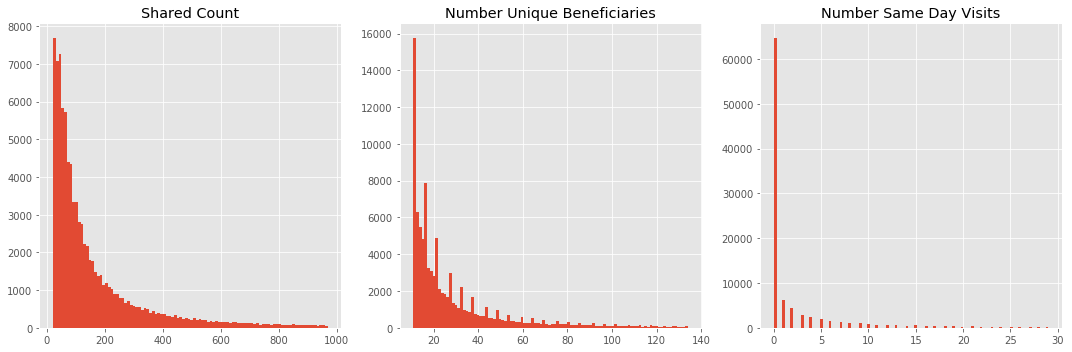

In [8]:
# Histograms
fig, axes = plt.subplots(1, 3, sharey=False, figsize=(15, 5))
for ax, var in zip(axes.ravel(), num_vars):
    low_q = sample_graph_df[var].quantile(0.05)
    high_q = sample_graph_df[var].quantile(1-0.05)
    ax.hist(sample_graph_df[var], bins=100, range=(low_q, high_q))
    ax.set_title(var)
plt.tight_layout()

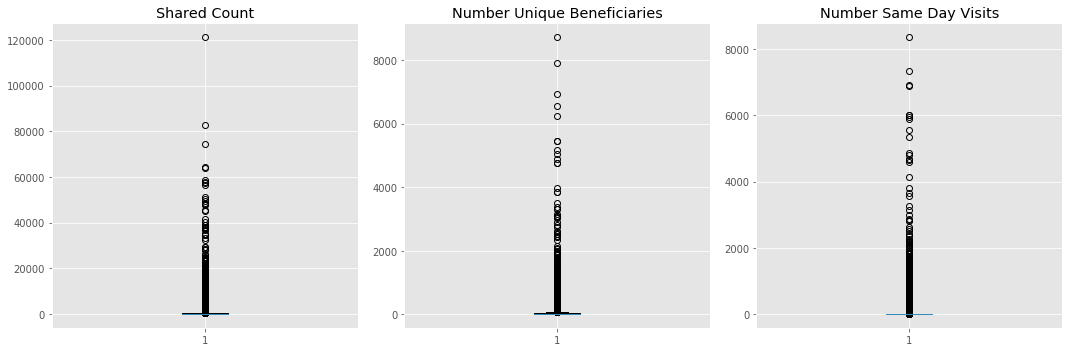

In [9]:
# Boxplots
fig, axes = plt.subplots(1, 3, sharey=False, figsize=(15, 5))
for ax, var in zip(axes.ravel(), num_vars):
    ax.boxplot(sample_graph_df[var])
    ax.set_title(var)
plt.tight_layout()

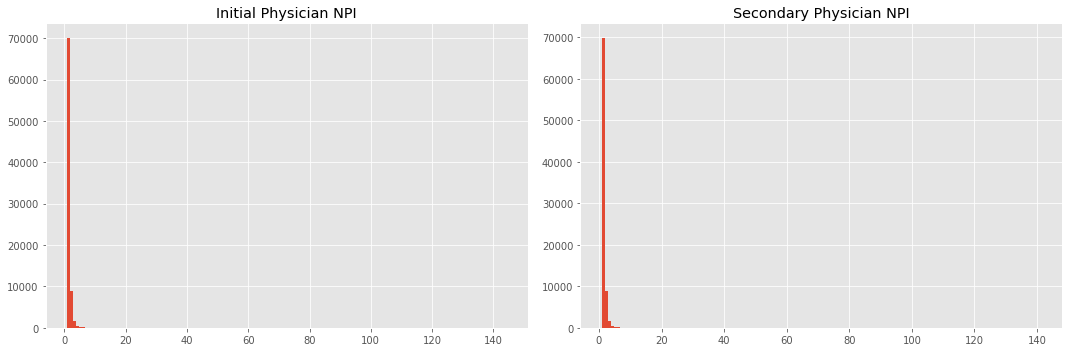

In [75]:
# Relationships
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(15, 5))
for ax, var in zip(axes.ravel(), relationship_vars):
    var_count = sample_graph_df.groupby(var).apply(len)
    ax.hist(var_count, bins=150)
    ax.set_title(var)
plt.tight_layout()

In [ ]:
# Graph unpacked attributes
# G = nx.DiGraph()
# counter = 0
# for idx in range(sample_graph_df.shape[0]):
#     if counter == 10:
#         break
#     u, v, total_shared, unique_shared, same_day_share = sample_graph_df.loc[idx]
#     G.add_edge(u, v, total_shared=total_shared, unique_shared=unique_shared, same_day_share=same_day_share)
#     counter += 1

In [ ]:
# Graph dict attributes
# G = nx.DiGraph()
# counter = 0
# for idx in range(sample_graph_df.shape[0]):
#     if counter == 10:
#         break
#     u, v  = sample_graph_df.loc[idx, relationship_vars]
#     d = sample_graph_df.loc[idx, num_vars].to_dict()
#     G.add_edge(u, v, attr_dict=d)
#     counter += 1

In [76]:
# Graph without attributes
G = nx.DiGraph()
# counter = 0
for idx in range(sample_graph_df.shape[0]):
#     if counter == 100:
#         break
    u, v  = sample_graph_df.loc[idx, relationship_vars]
    G.add_edge(u, v)
#     counter += 1

In [58]:
# Write grapth to a format in order to visualize on Gephi
nx.write_gml(G, '../data/graph/sample_graph.gml')
# https://gephi.org/users/quick-start/

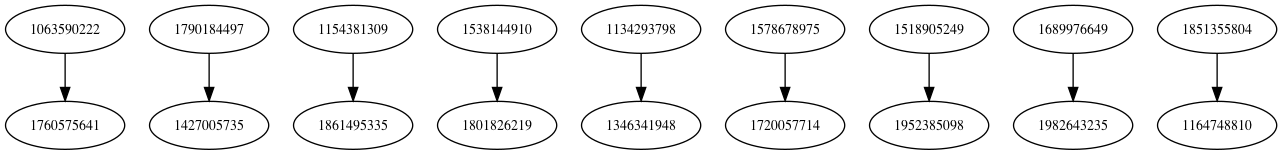

In [22]:
# nxpd.draw(G, show='ipynb')

In [25]:
# Centralities
# degree_centralities = nx.degree_centrality(G)
# betweenness_centralities = nx.betweenness_centrality(G)
# eigen_centralities = nx.eigenvector_centrality_numpy(G)

In [86]:
# Finding communities and modularities
# comms, mods = find_communities_modularities(G)

NetworkXNotImplemented: not implemented for directed type

## Dataset2: Physician Shared Patients Shared Patterns

## Dataset3: Physician Shared Patients Shared Patterns

## Combine Dataset: Physician Shared Patients Shared Patterns